# Analysis of Measure Summaries from qualitymeasures.ahrq.gov 

In [1]:
with open("../scripts/archive-status-ahrq-measure-summaries-seeds.uniq.with_mdt.tsv") as f:
    data = f.read()

In [2]:
from urllib.parse import urlparse

identifiers = []
mementocounts = []
timemaps = []
totalcount = 0
notarchived = []
alldata = {}

for line in data.splitlines():
    line = line.strip()
    row = line.split('\t')
    
    if row[1] == 'ARCHIVED':
        s2 = row[0].replace('https://qualitymeasures.ahrq.gov/summaries/summary/', '')
        try:
            identifier = int(s2[:s2.find('/')])
        except ValueError:
            print("failed on URI: " + row[0])
#         mementocount = int(row[2].replace("mementos", "").strip())
        timemap = eval(row[3])
        mementocount = len(timemap)
        
        identifiers.append( identifier )
        mementocounts.append( mementocount )
        
        timemaps.append( timemap )
        
        alldata[identifier] = timemap
        
    elif row[1] == 'NOT ARCHIVED':
        notarchived.append(row[0])
        
    totalcount += 1

In [3]:
len(identifiers)

2509

In [4]:
len(mementocounts)

2509

In [5]:
len(timemaps)

2509

In [6]:
totalcount

2533

In [7]:
len(notarchived)

24

In [8]:
len(notarchived) / totalcount

0.0094749309119621

In [9]:
len(timemaps) / totalcount

0.990525069088038

In [10]:
import matplotlib.pyplot as plt

In [11]:
max(mementocounts)

15

In [12]:
min(mementocounts)

1

In [13]:
min(identifiers)

26637

In [14]:
max(identifiers)

51250

counts: [ 81. 125.   0. 521.   0. 802.   0. 438. 208.   0. 142.   0.  78.   0.
  16.   0.   1.   1.   0.  12.   0.   8.   0.  55.  21.]
bars: [ 1.    1.56  2.12  2.68  3.24  3.8   4.36  4.92  5.48  6.04  6.6   7.16
  7.72  8.28  8.84  9.4   9.96 10.52 11.08 11.64 12.2  12.76 13.32 13.88
 14.44 15.  ]
bins: <a list of 25 Patch objects>
max counts: 802.0
index of max counts: 5
bars[ind]: 3.8000000000000003


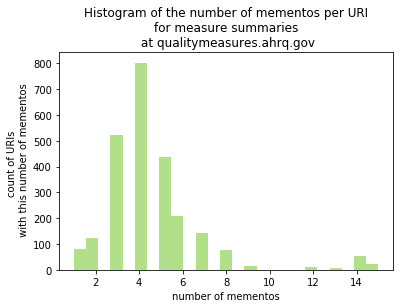

In [15]:
# plt.hist(mementocounts, bins=25, color="#b2df8a")
# plt.xlabel("number of mementos")
# plt.ylabel("count of URIs \n with this number of mementos")
# plt.title("Histogram of the number of mementos per URI\nfor qualitymeasures.ahrq.gov")

counts, bars, bins = plt.hist(mementocounts, bins=25, color="#b2df8a")
plt.xlabel("number of mementos")
plt.ylabel("count of URIs \n with this number of mementos")
plt.title("Histogram of the number of mementos per URI\nfor measure summaries\n at qualitymeasures.ahrq.gov")
print("counts: {}".format(counts))
print("bars: {}".format(bars))
print("bins: {}".format(bins))
print("max counts: {}".format(max(counts)))
ind = counts.tolist().index(max(counts))
print("index of max counts: {}".format(ind))
print("bars[ind]: {}".format(bars[ind]))

Text(0,0.5,'document identifier')

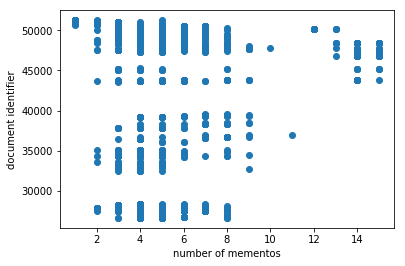

In [16]:
plt.scatter(mementocounts, identifiers)
plt.xlabel("number of mementos")
plt.ylabel("document identifier")

In [17]:
all_mdts = []

for timemap in timemaps:
    for memento in timemap:
        all_mdts.append(memento['datetime'])

In [18]:
len(all_mdts)

11656

In [19]:
min(all_mdts)

'2016-09-30T14:38:02Z'

In [20]:
max(all_mdts)

'2018-06-25T16:41:31Z'

In [21]:
from datetime import datetime

ids2mementos = []
mdt2ids = []
monthbuckets = {}

for identifier in alldata:
    timemap = alldata[identifier]
    
    for memento in timemap:
        
        ids2mementos.append(identifier)
        
        mdt = datetime.strptime(memento['datetime'], '%Y-%m-%dT%H:%M:%SZ')
        
        mdt2ids.append(mdt)
        monthbuckets.setdefault( datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m'), 0)
        monthbuckets[ datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m') ] += 1

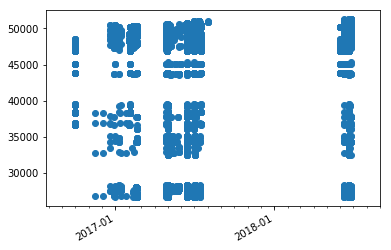

In [22]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()

ax.scatter(mdt2ids, ids2mementos)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate()

In [23]:
print("hi")

hi


In [24]:
x = []
y = []

for key in monthbuckets:
    x.append(key)
    y.append(monthbuckets[key])

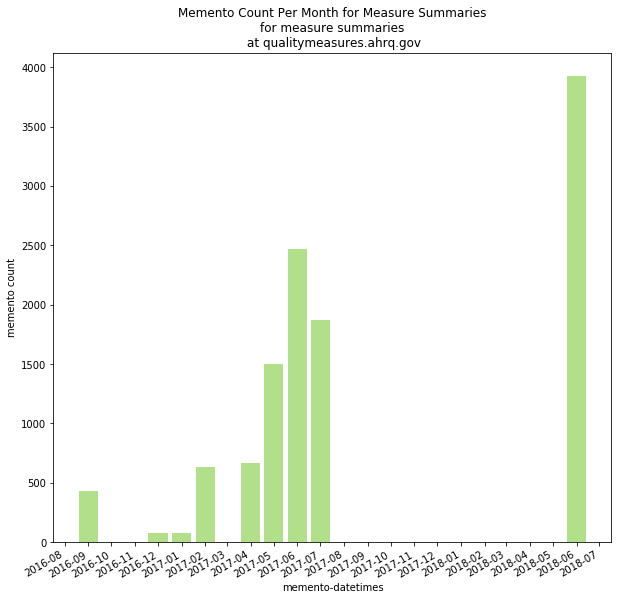

In [25]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.bar(x, y, width=25, color="#b2df8a")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

ax.set_xlabel("memento-datetimes")
ax.set_ylabel("memento count")
ax.set_title("Memento Count Per Month for Measure Summaries\nfor measure summaries\n at qualitymeasures.ahrq.gov")

fig.autofmt_xdate()

In [26]:
list(monthbuckets.keys())[0]

datetime.datetime(2017, 5, 1, 0, 0)

In [27]:
monthbuckets[list(monthbuckets.keys())[0]]

1505

In [28]:
from urllib.parse import urlparse

archivedomains = {}

for timemap in timemaps:
    
    for memento in timemap:
        urim = memento['uri']
        archivedomain = urlparse(urim).netloc.split(':')[0]
        archivedomains.setdefault(archivedomain, 0)
        archivedomains[archivedomain] += 1
        
        if 'archive-it.org' in archivedomain:
            print(urim)
            break

http://wayback.archive-it.org/all/20160930143938/https://www.qualitymeasures.ahrq.gov/summaries/summary/36635/Foreign-object-retention-percentage-of-unintentionally-retained-foreign-objects-during-labor-and-delivery
http://wayback.archive-it.org/all/20160930143943/https://www.qualitymeasures.ahrq.gov/summaries/summary/36636/Foreign-object-retention-percentage-of-vaginal-deliveries-where-a-baseline-count-was-conducted
http://wayback.archive-it.org/all/20160930143948/https://www.qualitymeasures.ahrq.gov/summaries/summary/36637/Foreign-object-retention-percentage-of-vaginal-deliveries-where-a-final-count-was-conducted
http://wayback.archive-it.org/all/20160930143933/https://www.qualitymeasures.ahrq.gov/summaries/summary/36638/Foreign-object-retention-percentage-of-cases-where-final-counts-were-not-reconciled-with-baseline-counts-and-imaging-was-performed
http://wayback.archive-it.org/all/20160930143802/https://www.qualitymeasures.ahrq.gov/summaries/summary/36652/Diagnosis-of-breast-diseas

In [29]:
archivedomains

{'web.archive.org': 9494, 'wayback.archive-it.org': 216}

In [30]:
total_mementos = 0

for ad in archivedomains:
    count = archivedomains[ad]
    total_mementos += count
    
total_mementos

9710

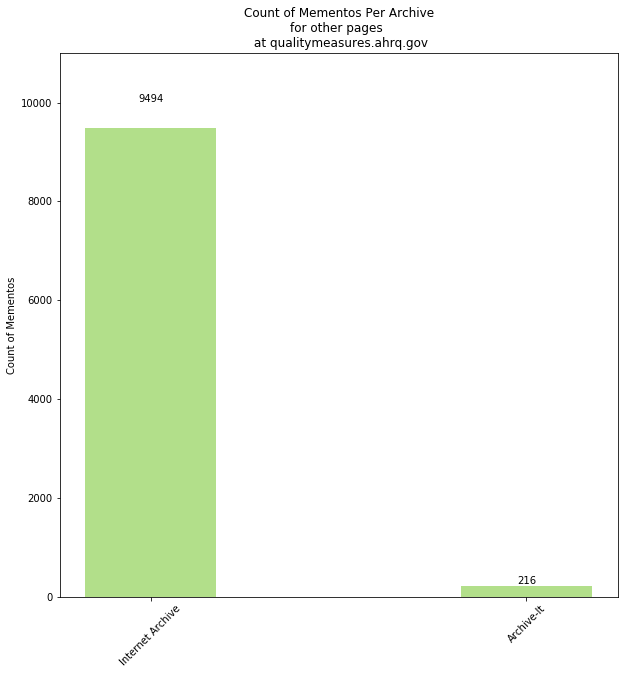

In [34]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 2
archivecounts = (9494, 216)
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
rects1 = ax.bar(ind, archivecounts, width, align='center', color="#b2df8a")

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count of Mementos')
ax.set_title('Count of Mementos Per Archive\nfor other pages \n at qualitymeasures.ahrq.gov')
ax.set_xticks(ind)
ax.set_xticklabels(('Internet Archive', 'Archive-It'))
ax.set_ylim(0, 11000)

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.show()